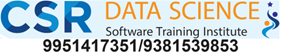

In [1]:
import pandas as pd

In [2]:
import numpy as np

# DATA EXTRACTION

In [3]:
df=pd.read_csv("titanica.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

# "DATA PREPROCESSING"

# Data Exploration and Analysis

In [6]:
import seaborn as sns

<Axes: >

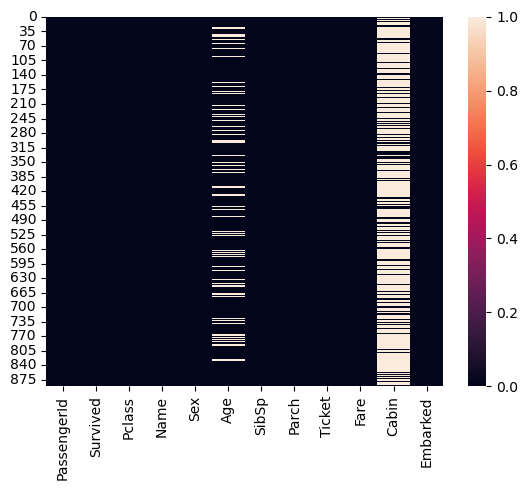

In [7]:
sns.heatmap(df.isnull())

<Axes: xlabel='Survived', ylabel='count'>

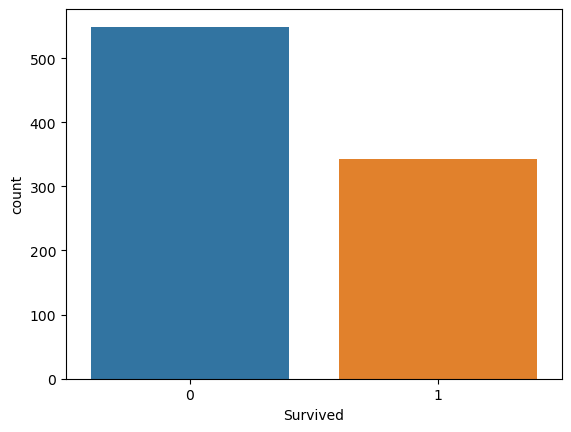

In [8]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

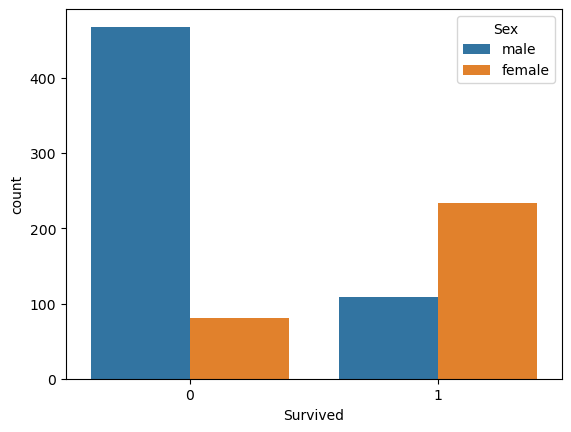

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: ylabel='Frequency'>

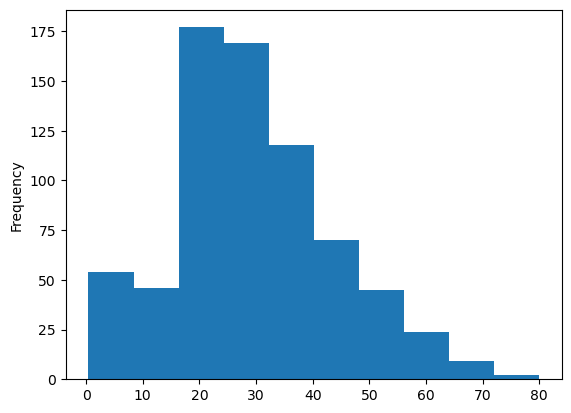

In [10]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

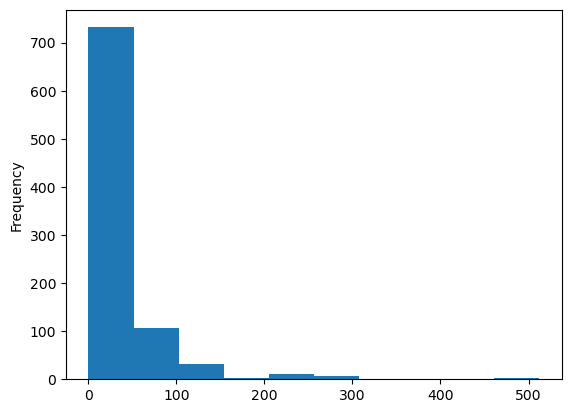

In [11]:
df['Fare'].plot.hist()

# Data Cleaning

In [12]:
df1=pd.read_csv("titanica.csv")

In [13]:
df1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [14]:
df1_num=df.select_dtypes(include=[np.number])
df1_cat=df.select_dtypes(include=[object])

In [15]:
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [16]:
df1_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


# Cleaning Number Data

In [17]:
df1_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [18]:
(df1_num.Age.isnull().sum())/len(df1_num)

0.19865319865319866

In [19]:
df1_num.Age.fillna(df1_num.Age.mean(),inplace=True)

In [20]:
df1_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Cleaning Cat Data

In [21]:
df1_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [22]:
(df1_cat.Cabin.isnull().sum())/len(df1_cat)

0.7710437710437711

In [23]:
(df1_cat.Embarked .isnull().sum())/len(df1_cat)

0.002244668911335578

In [24]:
df1_cat.Cabin.fillna(df1_cat.Cabin.value_counts().idxmax(),inplace=True)

In [25]:
df1_cat.Embarked.fillna(df1_cat.Embarked.value_counts().idxmax(),inplace=True)

In [26]:
df1_cat.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [27]:
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
df1_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


# Data Transform

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
df1_cat = df1_cat.apply(le.fit_transform)

In [32]:
df1_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2


In [33]:
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [34]:
df1_final = pd.concat([df1_num,df1_cat],axis=1)

In [35]:
df1_final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,47,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,81,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,47,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,55,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,47,2


In [47]:
from sklearn.naive_bayes import GaussianNB
NB1=GaussianNB()

In [37]:
from sklearn.naive_bayes import BernoulliNB
NB2=BernoulliNB()

In [38]:
from sklearn.naive_bayes import MultinomialNB
NB3=MultinomialNB()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x=df[["PassengerId"]]

In [41]:
y=df[["Survived"]]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit Model

In [43]:
NB1.fit(x_train,y_train)

C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [44]:
pre = NB1.predict(x_test)

In [45]:
fit=NB1.fit(x_train,y_train)

C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
fit.score(x_train,y_train)

0.62751677852349

In [48]:
NB2.fit(x_train,y_train)
pre = NB2.predict(x_test)
fit=NB2.fit(x_train,y_train)

C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
fit.score(x_train,y_train)

0.62751677852349

In [50]:
NB3.fit(x_train,y_train)
pre = NB3.predict(x_test)
fit=NB3.fit(x_train,y_train)

C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raoni\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
fit.score(x_train,y_train)

0.62751677852349